# Re-usable code to display financial metrics in our final app

This notebook serves as a point of reference & experimentation for various functions we can re-use for our data science project

In [1]:
# data handling
import pandas as pd
import numpy as np
# finance API
# Limit: 2000 requests per hour per IP, max 48'000 per day.
import yfinance as yf
# time & date packages
import time, datetime
from dateutil import parser
# API requests
import requests
# file handling
import io
# graphing
import plotly.graph_objects as go
import plotly.express as px
# randomization
import random

# Retrieve financial information from a list of tickers



In [2]:
# note: the function expects dates passed in "datetime" format, 
# and array of string tickers without $, such as "AAPL", not "$AAPL"
# example: ['AAPL', 'TSLA', 'NVDA']
def fetch_financial_data(tickers, start_date, end_date):
    
    # protective code in case a single string ticker was passed instead of an array:
    if type(tickers) == str:
        tickers = [tickers]

    
    # protective code in case dates were passed as strings instead of datetime:
    if type(start_date) == str:
        start_date = parser.parse(start_date)
    if type(end_date) == str:
        end_date = parser.parse(end_date)
    
    # Dataframe to store the stocks desired
    stocks = pd.DataFrame()
    
    for ticker in tickers:
        print(f"Fetching financial data about {ticker}...")
        
        # removing the $ in front of the ticker name if there is one
        if ticker[0] == '$':
            ticker = ticker[1:]
        stock = None # bug if you remove this line for some reason?
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        
        # If financial info was not found:
        if stock.empty:
            print(f"{stock} was not found on Yahoo Finance. Discarding")
        else:
            stock['ticker_name'] = ticker
            stocks = stocks.append(stock)
        
    # ---
    return stocks

In [3]:
# Example. It works!
fetch_financial_data(['TSLA', 'AAPL'], '2020-6-15', '2021/6/14')

Fetching financial data about TSLA...
Fetching financial data about AAPL...


,Open,High,Low,Close,Adj Close,Volume,ticker_name
Date,,,,,,,
2020-06-15,183.557999,199.768005,181.699997,198.179993,198.179993,78486000,TSLA
2020-06-16,202.369995,202.576004,192.477997,196.425995,196.425995,70255500,TSLA
2020-06-17,197.542007,201.000000,196.514008,198.358002,198.358002,49454000,TSLA
2020-06-18,200.600006,203.839996,198.893997,200.792007,200.792007,48759500,TSLA
2020-06-19,202.556000,203.194000,198.268005,200.179993,200.179993,43398500,TSLA
...,...,...,...,...,...,...,...
2021-06-07,126.169998,126.320000,124.830002,125.900002,125.368721,71057600,AAPL
2021-06-08,126.599998,128.460007,126.209999,126.739998,126.205177,74403800,AAPL
2021-06-09,127.209999,127.750000,126.519997,127.129997,126.593536,56877900,AAPL


In [4]:
# the function is flexible in formatting!
# All of the following formats are acceptable and will be handled
fetch_financial_data('AAPL', '2020-6-15', '2021/6/14')
fetch_financial_data('$AAPL', '2020-6-15', '2021/6/14')
fetch_financial_data(['$AAPL'], '2020-6-15', '2021/6/14')
fetch_financial_data(['$AAPL'], datetime.datetime(2020,6,15), '2021/6/14')

Fetching financial data about AAPL...
Fetching financial data about $AAPL...
Fetching financial data about $AAPL...
Fetching financial data about $AAPL...


,Open,High,Low,Close,Adj Close,Volume,ticker_name
Date,,,,,,,
2020-06-15,83.312500,86.419998,83.144997,85.747498,84.814171,138808800,AAPL
2020-06-16,87.864998,88.300003,86.180000,88.019997,87.061935,165428800,AAPL
2020-06-17,88.787498,88.849998,87.772499,87.897499,86.940765,114406400,AAPL
2020-06-18,87.852501,88.362503,87.305000,87.932503,86.975388,96820400,AAPL
2020-06-19,88.660004,89.139999,86.287498,87.430000,86.478363,264476000,AAPL
...,...,...,...,...,...,...,...
2021-06-07,126.169998,126.320000,124.830002,125.900002,125.368729,71057600,AAPL
2021-06-08,126.599998,128.460007,126.209999,126.739998,126.205177,74403800,AAPL
2021-06-09,127.209999,127.750000,126.519997,127.129997,126.593529,56877900,AAPL


# Graphing Historical Data

In [5]:
# Experimenting with Mahan, for Anvil Use
def plot_single_stock(ticker, period):
    if ticker[0] == "$":
        ticker = ticker[1:]
    print(ticker)
    stock = yf.Ticker(ticker)
    history = stock.history(period=period)
    # convert into strings for 
    history.index = history.index.astype(str)
    history_hash = history.to_dict()
    # print(history_hash)
    plot = go.Figure(data=go.Scatter(x=list(history_hash['Close'].keys()), y=list(history_hash['Close'].values()), 
                                     mode='lines'))
    plot.update_layout(title=f"Stock: {ticker}, Period: {period}")
    plot.show()
    return history

In [6]:
# without using previous function
# DOCUMENTATION TO CUSTOMIZE PLOT: https://plotly.com/python/figure-labels/

# VALID PERIOD 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
def plot_single_stock(ticker, period):
    if ticker[0] == "$":
        ticker = ticker[1:]
    print(ticker)
    stock = yf.Ticker(ticker)
    history = stock.history(period=period)
    plot = go.Figure(data=go.Scatter(x=history.index, y=history['Close'], 
                                     mode='lines'))
    plot.update_layout(title=f"Stock: {ticker}, Period: {period}")
    plot.show()
    return plot

In [13]:
plot_single_stock('TSLA', '5d')

TSLA


In [8]:
plot_single_stock('TSLA', '1y')

TSLA


In [9]:
plot_single_stock('TSLA', '1mo')

TSLA


In [10]:
plot_single_stock(ticker='$AAPL', period='max')

AAPL


In [11]:
plot_single_stock(ticker='NVDA', period='5d')

NVDA


# Graphing Results from the first function

In [12]:
fetch_financial_data(['TSLA'], '2020-6-15', '2021/6/14')

Fetching financial data about TSLA...


,Open,High,Low,Close,Adj Close,Volume,ticker_name
Date,,,,,,,
2020-06-15,183.557999,199.768005,181.699997,198.179993,198.179993,78486000,TSLA
2020-06-16,202.369995,202.576004,192.477997,196.425995,196.425995,70255500,TSLA
2020-06-17,197.542007,201.000000,196.514008,198.358002,198.358002,49454000,TSLA
2020-06-18,200.600006,203.839996,198.893997,200.792007,200.792007,48759500,TSLA
2020-06-19,202.556000,203.194000,198.268005,200.179993,200.179993,43398500,TSLA
...,...,...,...,...,...,...,...
2021-06-07,591.830017,610.000000,582.880005,605.130005,605.130005,22543700,TSLA
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400,TSLA
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600,TSLA


In [13]:
def plot_stock_df(ticker, period = '1w'):
    if ticker[0] == "$":
        ticker = ticker[1:]
    print(ticker)
    
    # ALLOWED PERIOD: xm, xh, xd, xwk, xmo, xy
    # if 
    
    # today = 
    stock_df = fetch_financial_data(['TSLA'], '2020-6-15', '2021/6/14')
    # stock_df = yf.Ticker(ticker)
    # history = stock.history(period=period)
    plot = go.Figure(data=go.Scatter(x=history.index, y=history['Close'], 
                                     mode='lines'))
    plot.update_layout(title=f"Stock: {ticker}, Period: {period}")
    plot.show()
    return plot

    # MORE WORK TO BE DONE
    

# Testing to plot the DF turned into a dictionary to work around Anvil's serialization problem

In [14]:
# ANVIL PLAYGROUND
def plot_single_stock(ticker, period):
    if ticker[0] == "$":
        ticker = ticker[1:]
        
    stock = yf.Ticker(ticker)
    history = stock.history(period=period)
    
    # converting index into a column
    history = history.reset_index()
    # history.index = history.index.astype(str)
    # history_hash = history.to_dict()
    dates = list(history['Date'])
    string_dates = [str(x) for x in dates]
    prices = list(history['Close'])
    return string_dates, prices

In [15]:
test_data_dict = plot_single_stock('TSLA', '1y')
test_data_dict

(['2021-04-20 00:00:00',
  '2021-04-21 00:00:00',
  '2021-04-22 00:00:00',
  '2021-04-23 00:00:00',
  '2021-04-26 00:00:00',
  '2021-04-27 00:00:00',
  '2021-04-28 00:00:00',
  '2021-04-29 00:00:00',
  '2021-04-30 00:00:00',
  '2021-05-03 00:00:00',
  '2021-05-04 00:00:00',
  '2021-05-05 00:00:00',
  '2021-05-06 00:00:00',
  '2021-05-07 00:00:00',
  '2021-05-10 00:00:00',
  '2021-05-11 00:00:00',
  '2021-05-12 00:00:00',
  '2021-05-13 00:00:00',
  '2021-05-14 00:00:00',
  '2021-05-17 00:00:00',
  '2021-05-18 00:00:00',
  '2021-05-19 00:00:00',
  '2021-05-20 00:00:00',
  '2021-05-21 00:00:00',
  '2021-05-24 00:00:00',
  '2021-05-25 00:00:00',
  '2021-05-26 00:00:00',
  '2021-05-27 00:00:00',
  '2021-05-28 00:00:00',
  '2021-06-01 00:00:00',
  '2021-06-02 00:00:00',
  '2021-06-03 00:00:00',
  '2021-06-04 00:00:00',
  '2021-06-07 00:00:00',
  '2021-06-08 00:00:00',
  '2021-06-09 00:00:00',
  '2021-06-10 00:00:00',
  '2021-06-11 00:00:00',
  '2021-06-14 00:00:00',
  '2021-06-15 00:00:00',


In [16]:
# list(test_data_dict['Date'])

In [18]:
# plot = go.Figure(data=go.Scatter(x=list(test_data_dict['Close'].keys()), y=list(test_data_dict['Close'].values()), 
                                     # mode='lines'))
#plot.update_layout(title=f"Stock: {ticker}, Period: {period}")
# plot.show()

IndentationError: unexpected indent (4239080503.py, line 2)

# Bar Chart of Most Frequent Mentions, 1 period

In [19]:
def SetColor(sentiment):
    if sentiment.lower() == 'positive':
        return 'green'
    elif sentiment.lower() == 'negative':
        return 'red'
    else:
        return 'yellow'
    

fake_data = {
      'TSLA': 29,
      'GME': 23,
      'AAPL': 26,
      'RPRX': 5,
      'GOOG': 32
    }

fake_data2 = {
    'Tickers': ['TSLA', 'GME', 'AAPL', 'RPRX', 'GOOG'],
    'Mentions': [29, 23, 26, 5, 32]
}

# Extra field for Sentiment, which we'll use to color code
fake_data4 = {
    'Tickers': ['TSLA', 'GME', 'AAPL', 'RPRX', 'GOOG'],
    'Mentions': [29, 23, 26, 5, 32],
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Positive', 'Negative']
}


# converting from format 1 to format 2
fake_data3 = {'Tickers': list(fake_data.keys()), 'Mentions': list(fake_data.values())}
# leads to the exact same result
print(fake_data3 == fake_data2) 


##### WITHOUT COLOR ########
# plot bar chart, doesn't care about the amount
plot = go.Figure(data=go.Bar(x=fake_data2['Tickers'], y=fake_data2['Mentions']))
# make it descending
plot.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

plot.show()


##### WITH COLOR #########
# plot bar chart, doesn't care about the amount
plot = go.Figure(data=go.Bar(x=fake_data4['Tickers'], y=fake_data4['Mentions'], marker=dict(color = list(map(SetColor, fake_data4['Sentiment'])))))
# make it descending
plot.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

plot.show()

True


# Bar Chart of Most Frequent Mentions, several periods

In [21]:
# slow way, using "go" only

steps = ['2 days ago', '1 day ago', 'Today']

# need to manually create one bar chart per ticker,
# each ticker. needs to have lists matching the size of "steps"
plot = go.Figure(data=[go.Bar(
    name = 'AAPL',
    x = steps,
    y = [24, 32, 19]
   ),
                       go.Bar(
    name = 'TSLA',
    x = steps,
    y = [56, 123, 43, 55]
   ),
                       go.Bar(
    name = 'GME',
    x = steps,
    y = [14, 11, 43, 28]
   )                    
])
                   
plot.show()

In [ ]:
# Faster way, but we need a DF with the data inside it
fake_data5 = pd.read_csv('fake_data5.csv')

fake_data5.head(16)

In [ ]:
fig = px.bar(fake_data5, x="Date", y="Mentions",
             color="Ticker",
             barmode = 'group')
   
fig.show()

# Customer Feedback: Doesn't like bar charts => Let's swap the previous fig to a stacked line chart instead

In [27]:
# One line

dates = ['2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24' ]
mentions = [24, 32, 19, 16, 25, 32, 4]

fig = px.line(x=dates, y=mentions)
fig.show()

In [42]:
# Several Lines => much easier to use a DataFrame. Let's load a fake one:
df_fake = pd.read_csv('fake_linechart_data.csv')

df_fake.head(8)

,date,ticker,mentions
0,11.04.22,TSLA,53
1,11.04.22,GOOG,24
2,11.04.22,TWTR,73
3,11.04.22,GME,65
4,11.04.22,AMZN,50
5,13.04.22,TSLA,38
6,13.04.22,GOOG,25
7,13.04.22,TWTR,15


In [43]:
fig = px.line(data_frame= df_fake, x='date', y='mentions', color='ticker', title='Recent Mentions')
fig.show()

In [52]:
# creating a similar plot without using DFs (you never know). Not as flexible, don't recommend it


random_x = ['2022-04-15', '2022-04-16', '2022-04-17', '2022-04-19', '2022-04-23', '2022-04-24', '2022-04-25']
random_y0 = [random.randint(5, 75) for i in range(7)]
random_y1 = [random.randint(5, 75) for i in range(7)]
random_y2 = [random.randint(5, 75) for i in range(7)]

# Create traces
fig = go.Figure()
fig.add_trace(px.line(x=random_x, y= random_y0).data[0])
fig.add_trace(px.line(x=random_x, y= random_y1).data[0])
fig.add_trace(px.line(x=random_x, y= random_y2).data[0])

fig.show()

# Plotting the Sentiment Chart

This will go to the right of the "price" chart

In [46]:
# example row When pulling from the DB in anvil, the data will likely look like this:

# this assumes that it has already been filtered out for a specific stock
anvil_table_output = [
    {'ticker': 'TSLA', 'mentions': 123, 'negative_percent': 45.54, 'positive_percent': 18.55, 'overall_sentiment': 'negative', 'date': '04/02/2022'},
    {'ticker': 'TSLA', 'mentions': 117, 'negative_percent': 32, 'positive_percent': 43, 'overall_sentiment': 'positive', 'date': '04/04/2022'},
    {'ticker': 'TSLA', 'mentions': 153, 'negative_percent': 64, 'positive_percent': 9, 'overall_sentiment': 'negative', 'date': '04/05/2022'},
    {'ticker': 'TSLA', 'mentions': 128, 'negative_percent': 17, 'positive_percent': 5, 'overall_sentiment': 'negative', 'date': '04/06/2022'},
    {'ticker': 'TSLA', 'mentions': 141, 'negative_percent': 24, 'positive_percent': 32, 'overall_sentiment': 'positive', 'date': '04/08/2022'},
    {'ticker': 'TSLA', 'mentions': 105, 'negative_percent': 35, 'positive_percent': 49, 'overall_sentiment': 'positive', 'date': '04/09/2022'},
    {'ticker': 'TSLA', 'mentions': 198, 'negative_percent': 15, 'positive_percent': 26, 'overall_sentiment': 'positive', 'date': '04/10/2022'},
]

# next, we need to prep the data for plotting. we need:
# dates as x-axis
# the biggest absolute value between pos and neg, and if neg convert to negative

x_dates = []
y_sentiment_scores = []
for row in anvil_table_output:
    # converting string date m/d/y into a datetime date object
    x_dates.append(datetime.datetime.strptime(row['date'], "%m/%d/%Y").date())
    if row['positive_percent'] >= row['negative_percent']:
        y_sentiment_scores.append(row['positive_percent'])
    else:
        y_sentiment_scores.append(-1 * row['negative_percent'])


# similar code as above but shoving everything in a DF
df_rows = []
for row in anvil_table_output:
    new_df_row = row
    # converting string date m/d/y into a datetime date object
    new_df_row['date'] = datetime.datetime.strptime(row['date'], "%m/%d/%Y").date()
    if row['positive_percent'] >= row['negative_percent']:
        new_df_row['sentiment_score'] = row['positive_percent']
        new_df_row['color'] = 'green'
    else:
        new_df_row['sentiment_score'] = (-1 * row['negative_percent'])
        new_df_row['color'] = 'red'
    
    df_rows.append(new_df_row)

df = pd.DataFrame(df_rows)


# Plotting data using arrays
# fig = px.line(x=x_dates, y=y_sentiment_scores, title='Recent Mentions', markers=True)
# fig.show()

# Plotting data using DF
fig = px.line(df, x='date', y='sentiment_score',
                  hover_data = ["positive_percent", "negative_percent"],
                 text='overall_sentiment',
              markers=True
                 )
fig.update_traces(marker=dict(
            color=df['color'],
            size=20))
fig.update_traces(textposition="top left")
fig.show()


df.head()

    
    
    

,ticker,mentions,negative_percent,positive_percent,overall_sentiment,date,sentiment_score,color
0,TSLA,123,45.54,18.55,negative,2022-04-02,-45.54,red
1,TSLA,117,32.00,43.00,positive,2022-04-04,43.00,green
2,TSLA,153,64.00,9.00,negative,2022-04-05,-64.00,red
3,TSLA,128,17.00,5.00,negative,2022-04-06,-17.00,red
4,TSLA,141,24.00,32.00,positive,2022-04-08,32.00,green


 datetime.datetime.strptime('04/04/2022', "%m/%d/%Y").date()

# Concept Chart: Mentions + Sentiment on the same chart

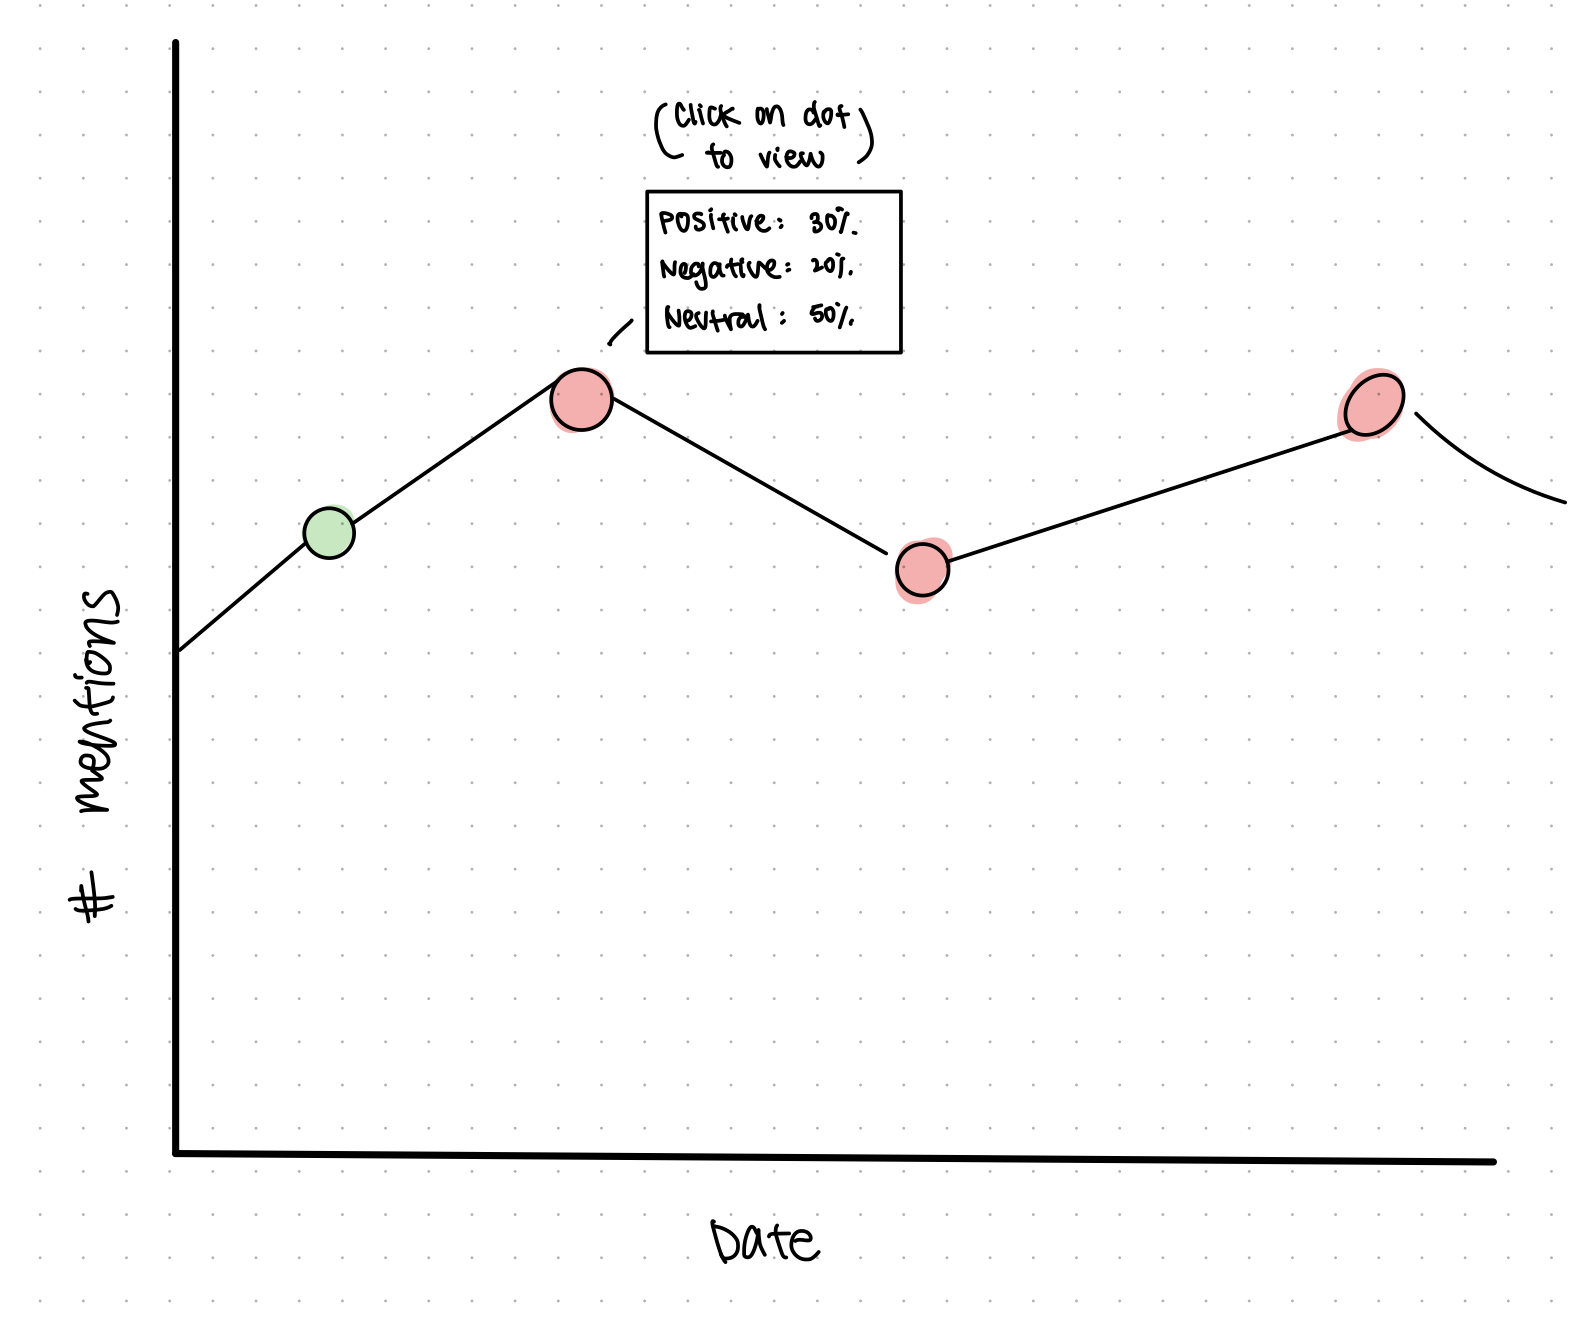

In [1]:
# Here's the idea
from IPython.display import Image
Image(filename='concept.jpg') 

In [5]:
# example row When pulling from the DB in anvil, the data will likely look like this:

# this assumes that it has already been filtered out for a specific stock
anvil_table_output = [
    {'ticker': 'TSLA', 'mentions': 123, 'negative_percent': 45.54, 'positive_percent': 18.55, 'overall_sentiment': 'negative', 'date': '04/02/2022'},
    {'ticker': 'TSLA', 'mentions': 117, 'negative_percent': 32, 'positive_percent': 43, 'overall_sentiment': 'positive', 'date': '04/04/2022'},
    {'ticker': 'TSLA', 'mentions': 153, 'negative_percent': 64, 'positive_percent': 9, 'overall_sentiment': 'negative', 'date': '04/05/2022'},
    {'ticker': 'TSLA', 'mentions': 128, 'negative_percent': 17, 'positive_percent': 5, 'overall_sentiment': 'negative', 'date': '04/06/2022'},
    {'ticker': 'TSLA', 'mentions': 141, 'negative_percent': 24, 'positive_percent': 32, 'overall_sentiment': 'positive', 'date': '04/08/2022'},
    {'ticker': 'TSLA', 'mentions': 105, 'negative_percent': 35, 'positive_percent': 49, 'overall_sentiment': 'positive', 'date': '04/09/2022'},
    {'ticker': 'TSLA', 'mentions': 198, 'negative_percent': 15, 'positive_percent': 26, 'overall_sentiment': 'positive', 'date': '04/10/2022'},
]

# next, we need to prep the data for plotting. we need:
# dates as x-axis
# the biggest absolute value between pos and neg, and if neg convert to negative

df_rows = []
for row in anvil_table_output:
    new_df_row = row
    # converting string date m/d/y into a datetime date object
    new_df_row['date'] = datetime.datetime.strptime(row['date'], "%m/%d/%Y").date()
    if row['overall_sentiment'] == 'positive':
        new_df_row['color'] = 'green'
    else:
        new_df_row['color'] = 'red'
    
    new_df_row['neutral_percent'] = round(100 - new_df_row['positive_percent'] - new_df_row['negative_percent'], 2)
    df_rows.append(new_df_row)

df = pd.DataFrame(df_rows)



# Plotting data using DF
fig = px.line(df, x='date', y='mentions',
                  hover_data = ["positive_percent", "negative_percent", "neutral_percent"],
                 text='overall_sentiment',
              markers=True
                 )
fig.update_traces(marker=dict(
            color=df['color'],
            size=20))
fig.update_traces(textposition="top left")
fig.update_layout(hovermode="x")
fig.show()


df.head()

,ticker,mentions,negative_percent,positive_percent,overall_sentiment,date,color,neutral_percent
0,TSLA,123,45.54,18.55,negative,2022-04-02,red,35.91
1,TSLA,117,32.00,43.00,positive,2022-04-04,green,25.00
2,TSLA,153,64.00,9.00,negative,2022-04-05,red,27.00
3,TSLA,128,17.00,5.00,negative,2022-04-06,red,78.00
4,TSLA,141,24.00,32.00,positive,2022-04-08,green,44.00


# Same as above but with more discrete labels

In [4]:
# example row When pulling from the DB in anvil, the data will likely look like this:

# this assumes that it has already been filtered out for a specific stock
anvil_table_output = [
    {'ticker': 'TSLA', 'mentions': 123, 'negative_percent': 45.54, 'positive_percent': 18.55, 'overall_sentiment': 'negative', 'date': '04/02/2022'},
    {'ticker': 'TSLA', 'mentions': 117, 'negative_percent': 32, 'positive_percent': 43, 'overall_sentiment': 'positive', 'date': '04/04/2022'},
    {'ticker': 'TSLA', 'mentions': 153, 'negative_percent': 64, 'positive_percent': 9, 'overall_sentiment': 'negative', 'date': '04/05/2022'},
    {'ticker': 'TSLA', 'mentions': 128, 'negative_percent': 17, 'positive_percent': 5, 'overall_sentiment': 'negative', 'date': '04/06/2022'},
    {'ticker': 'TSLA', 'mentions': 141, 'negative_percent': 24, 'positive_percent': 32, 'overall_sentiment': 'positive', 'date': '04/08/2022'},
    {'ticker': 'TSLA', 'mentions': 105, 'negative_percent': 35, 'positive_percent': 49, 'overall_sentiment': 'positive', 'date': '04/09/2022'},
    {'ticker': 'TSLA', 'mentions': 198, 'negative_percent': 15, 'positive_percent': 26, 'overall_sentiment': 'positive', 'date': '04/10/2022'},
]

# next, we need to prep the data for plotting. we need:
# dates as x-axis
# the biggest absolute value between pos and neg, and if neg convert to negative

df_rows = []
for row in anvil_table_output:
    new_df_row = row
    # converting string date m/d/y into a datetime date object
    new_df_row['date'] = datetime.datetime.strptime(row['date'], "%m/%d/%Y").date()
    if row['overall_sentiment'] == 'positive':
        new_df_row['color'] = 'green'
        new_df_row['label'] = '+'
    else:
        new_df_row['color'] = 'red'
        new_df_row['label'] = '-'
    
    new_df_row['neutral_percent'] = round(100 - new_df_row['positive_percent'] - new_df_row['negative_percent'], 2)
    df_rows.append(new_df_row)

df = pd.DataFrame(df_rows)



# Plotting data using DF
fig = px.line(df, x='date', y='mentions',
                  hover_data = ["positive_percent", "negative_percent", "neutral_percent"],
                 text='label',
              markers=True
                 )
fig.update_traces(marker=dict(
            color=df['color'],
            size=20))
fig.update_traces(textposition="middle center", 
                  textfont=dict(
                                size=18,
                                color="white"
                                )
                 )
fig.update_layout(hovermode="x")
fig.show()


df.head()

,ticker,mentions,negative_percent,positive_percent,overall_sentiment,date,color,label,neutral_percent
0,TSLA,123,45.54,18.55,negative,2022-04-02,red,-,35.91
1,TSLA,117,32.00,43.00,positive,2022-04-04,green,+,25.00
2,TSLA,153,64.00,9.00,negative,2022-04-05,red,-,27.00
3,TSLA,128,17.00,5.00,negative,2022-04-06,red,-,78.00
4,TSLA,141,24.00,32.00,positive,2022-04-08,green,+,44.00
